In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from pathlib import Path
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
import sys
sys.path.append('../../src')
from eda_utils import get_high_freq_columns, get_corr, get_high_corr_columns, missing_values_percentage

In [3]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
data_dir = '../data'

In [5]:
df = pd.read_csv(f"{data_dir}/raw/train.csv", index_col='Id').convert_dtypes()
display(df.shape)
df.head(2)

(1460, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,<NA>,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,<NA>,<NA>,<NA>,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,<NA>,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,<NA>,<NA>,<NA>,0,5,2007,WD,Normal,181500


### Pandas profiling

In [6]:
# profile = df.profile_report(
#     title='Train dataset report',
#     correlations={"cramers": {"calculate": False}},
# )
# profile.to_file(output_file="../reports/eda.html")

In [7]:
# profile = ProfileReport(
#     df,
#     title='Train dataset minimal report',
#     minimal=True, explorative=True
# )
# profile.to_file(output_file="../reports/eda_minimal.html")

### Conclusion from report file

- columns with missin values
- column skewed 
- columns with zeros
- columns with hige frequency

In [8]:
categorical_cols = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenAbvGr', 'KitchenQual', 'SaleCondition',
    'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',  'GarageYrBlt', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold', 'SaleType', 
]
binary_cols= [
    'CentralAir', 
]
numeric_cols = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
]

In [9]:
len(categorical_cols+numeric_cols+binary_cols) == len(df.columns)

True

## Missin Values

### Percent of missing values for each column

In [10]:
missing_values_percentage(df)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [11]:
cols_fillna_zero = [
    "GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath",
    "3SsnPorch", "EnclosedPorch", "ScreenPorch", "MasVnrArea", "PoolArea", "YrSold", "YearBuilt", 
] # When NaN says there is 0
cols_fillna_none = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "GarageCond",
    "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "MasVnrType", ""
]  # When NaN is a categorical feature
cols_fillna_must_ferq = [
    'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
     'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearRemodAdd', 'RoofStyle',
     'RoofMatl',  'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
     'HeatingQC', 'Electrical', 'KitchenAbvGr', 'KitchenQual', 'SaleCondition', 'Functional', 'Fireplaces',
     'PavedDrive', 'SaleType'
]  # fill categorical column with must frequency value

### Correlation between columns with missing values

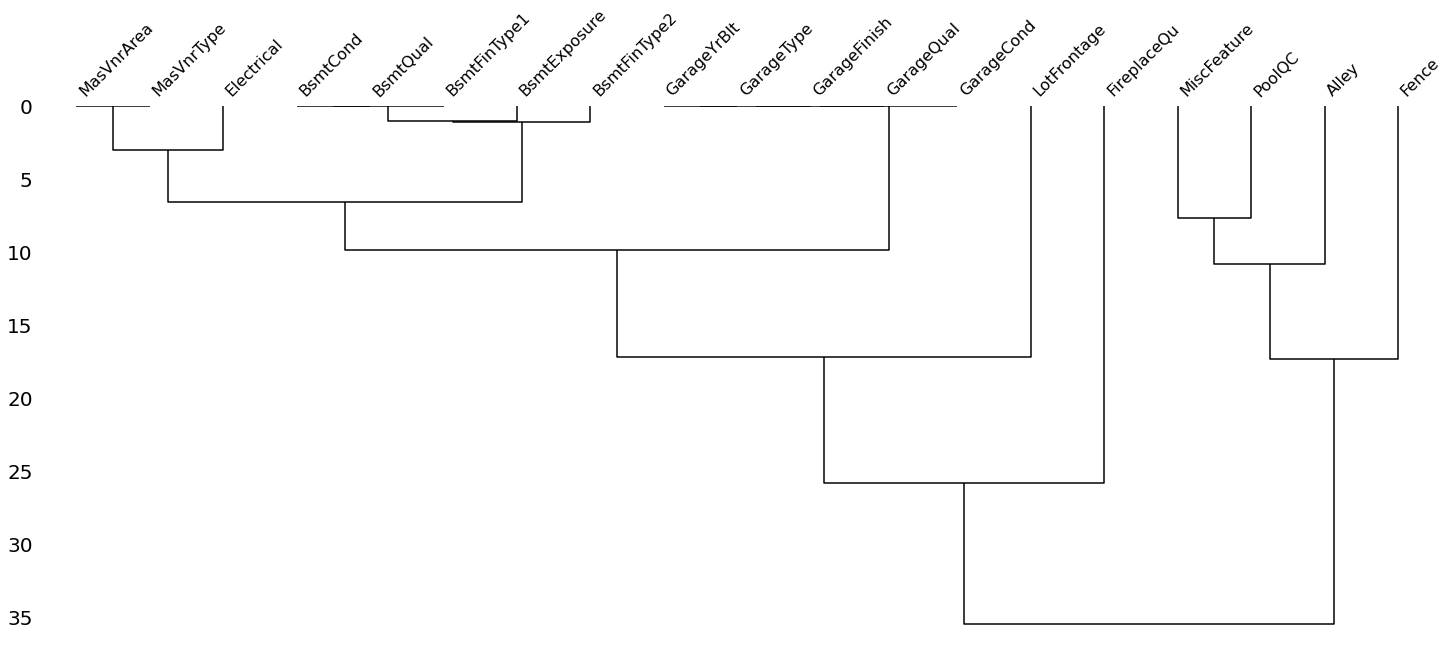

In [12]:
msno.dendrogram(df[df.columns[df.isna().any()]]);

In [13]:
df[numeric_cols].nunique().sort_values()

HalfBath            3
BsmtHalfBath        3
BsmtFullBath        4
FullBath            4
GarageCars          5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
ScreenPorch        76
LotFrontage       110
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

In [14]:
df[categorical_cols].nunique().sort_values()

Street             2
Alley              2
Utilities          2
GarageFinish       3
LandSlope          3
PavedDrive         3
PoolQC             3
Fireplaces         4
KitchenQual        4
KitchenAbvGr       4
BsmtExposure       4
BsmtCond           4
ExterQual          4
MasVnrType         4
BsmtQual           4
LotShape           4
LandContour        4
Fence              4
MiscFeature        4
BldgType           5
FireplaceQu        5
MSZoning           5
Electrical         5
HeatingQC          5
LotConfig          5
GarageQual         5
ExterCond          5
GarageCond         5
YrSold             5
Foundation         6
BsmtFinType2       6
Heating            6
GarageType         6
SaleCondition      6
RoofStyle          6
BsmtFinType1       6
Functional         7
HouseStyle         8
Condition2         8
RoofMatl           8
SaleType           9
Condition1         9
Exterior1st       15
MSSubClass        15
Exterior2nd       16
Neighborhood      25
YearRemodAdd      61
GarageYrBlt  

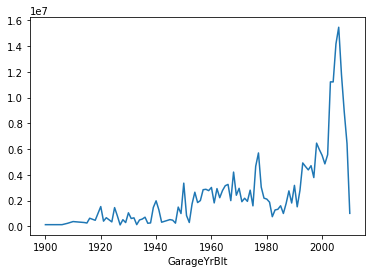

In [15]:
df.groupby(['GarageYrBlt'])['SalePrice'].sum().plot();

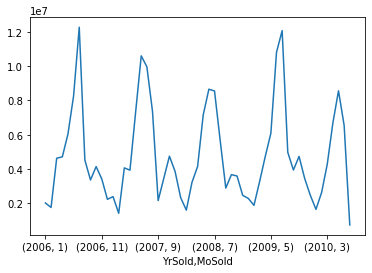

In [16]:
df.groupby(['YrSold', 'MoSold'])['SalePrice'].sum().plot();

In [17]:
threshold = 0.95
high_freq_columns = get_high_freq_columns(df, threshold)
high_freq_columns

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

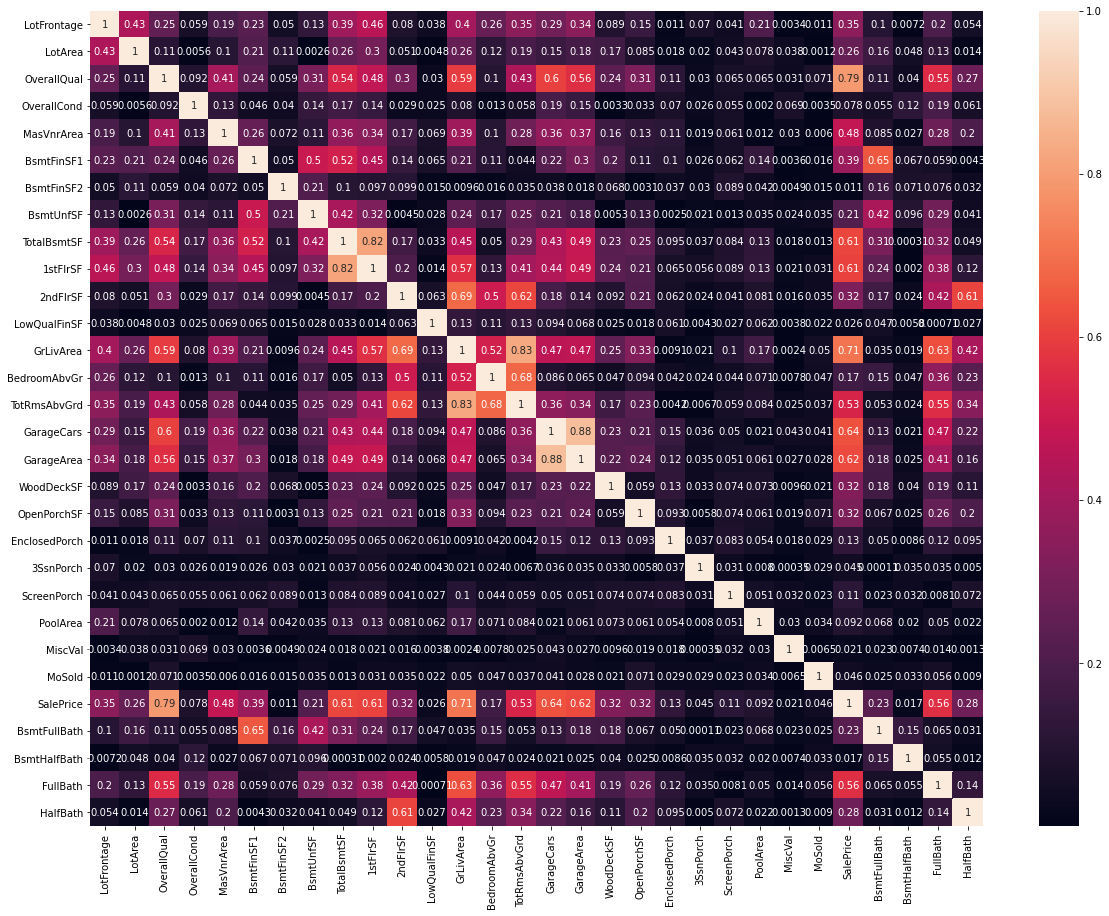

In [18]:
plt.figure(figsize=(20, 15))
sns.heatmap(abs(df[numeric_cols].corr()), annot=True);

In [30]:
threshold = 0.85

In [31]:
high_numeric_corrs_columns = get_high_corr_columns(df[numeric_cols], threshold)
high_numeric_corrs_columns

[('GarageArea', 'GarageCars')]

In [32]:
# TODO: CHI SQUARE   
high_categorical_corrs_columns = get_high_corr_columns(df[categorical_cols + binary_cols], threshold)
high_categorical_corrs_columns

[]

In [33]:
sorted([
    (k[1], v) for k, v in get_corr(df[numeric_cols]).items()
    if k[0] == 'SalePrice'
], key=lambda x: x[1], reverse=True)

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838053),
 ('GrLivArea', 0.7086244776126515),
 ('GarageCars', 0.6404091972583519),
 ('GarageArea', 0.6234314389183622),
 ('TotalBsmtSF', 0.6135805515591943),
 ('1stFlrSF', 0.6058521846919153),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('MasVnrArea', 0.47749304709571444),
 ('BsmtFinSF1', 0.3864198062421535),
 ('LotFrontage', 0.35179909657067737),
 ('WoodDeckSF', 0.32441344456812926),
 ('2ndFlrSF', 0.31933380283206736),
 ('OpenPorchSF', 0.31585622711605504),
 ('LotArea', 0.2638433538714051),
 ('BsmtUnfSF', 0.21447910554696928),
 ('BedroomAbvGr', 0.16821315430073963),
 ('EnclosedPorch', 0.1285779579259566),
 ('ScreenPorch', 0.11144657114291112),
 ('PoolArea', 0.09240354949187318),
 ('OverallCond', 0.07785589404867797),
 ('MoSold', 0.046432245223819446),
 ('3SsnPorch', 0.04458366533574838),
 ('LowQualFinSF', 0.02560613000067955),
 ('MiscVal', 0.021189579640303213),
 ('BsmtFinSF2', 0.011378121450215146),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath'

### Outliers

In [34]:
y_col = 'SalePrice'
x_cols = [c for c in numeric_cols if c != y_col]
cols = 5
rows = math.ceil(len(x_cols)/cols)

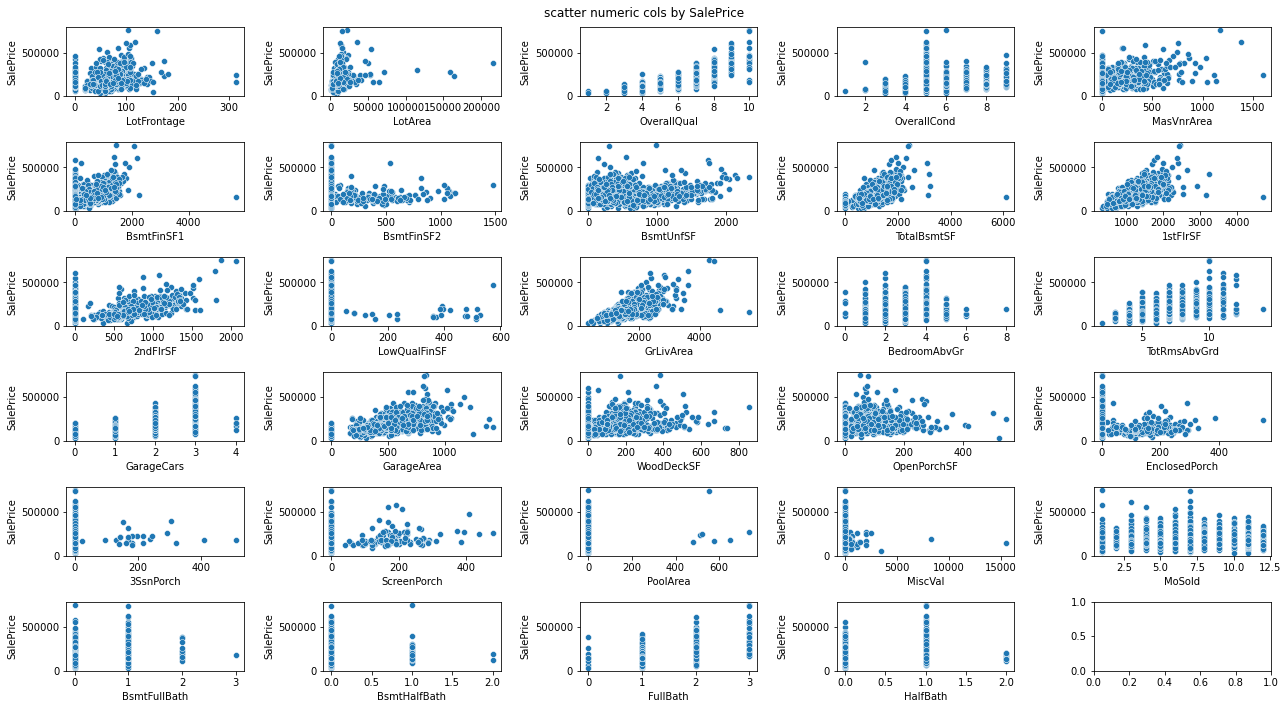

In [35]:
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
fig.suptitle('scatter numeric cols by SalePrice')
points = [(r, c) for r in range(rows) for c in range(cols)]
for i, point in enumerate(points[:len(x_cols)]):
    sns.scatterplot(ax=axes[point], data=df[numeric_cols].fillna(0), y=y_col, x=x_cols[i])
fig.tight_layout()
plt.show()

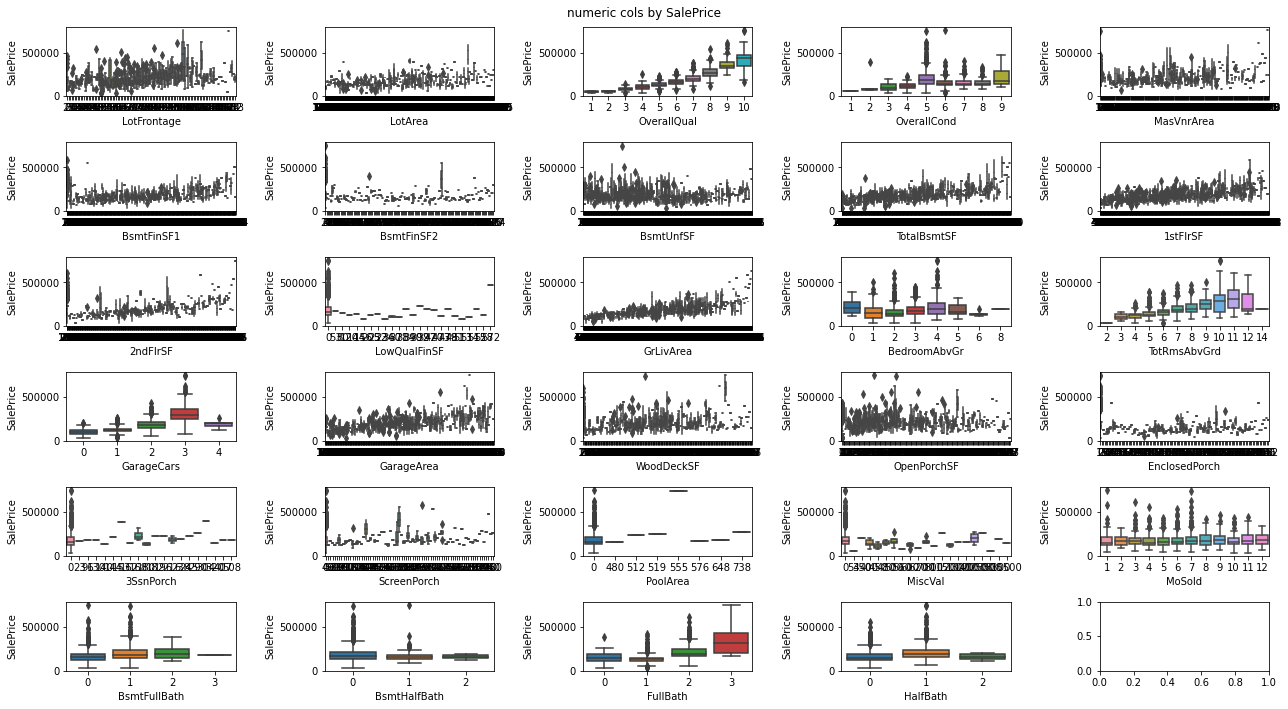

In [36]:
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
fig.suptitle('numeric cols by SalePrice')
points = [(r, c) for r in range(rows) for c in range(cols)]
for i, point in enumerate(points[:len(x_cols)]):
    sns.boxplot(ax=axes[point], data=df[numeric_cols].fillna(0), y=y_col, x=x_cols[i])
fig.tight_layout()
plt.show()

In [37]:
# Variance of the dataframe
df[numeric_cols].var().sort_values()

BsmtHalfBath                0.06
HalfBath                    0.25
BsmtFullBath                0.27
FullBath                    0.30
GarageCars                  0.56
BedroomAbvGr                0.67
OverallCond                 1.24
OverallQual                 1.91
TotRmsAbvGrd                2.64
MoSold                      7.31
LotFrontage               589.75
3SsnPorch                 859.51
PoolArea                1,614.22
LowQualFinSF            2,364.20
ScreenPorch             3,108.89
EnclosedPorch           3,735.55
OpenPorchSF             4,389.86
WoodDeckSF             15,709.81
BsmtFinSF2             26,023.91
MasVnrArea             32,784.97
GarageArea             45,712.51
1stFlrSF              149,450.08
2ndFlrSF              190,557.08
TotalBsmtSF           192,462.36
BsmtUnfSF             195,246.41
BsmtFinSF1            208,025.47
MiscVal               246,138.06
GrLivArea             276,129.63
LotArea            99,625,649.65
SalePrice       6,311,111,264.30
dtype: flo

In [38]:
df[numeric_cols].std().sort_values()

BsmtHalfBath         0.24
HalfBath             0.50
BsmtFullBath         0.52
FullBath             0.55
GarageCars           0.75
BedroomAbvGr         0.82
OverallCond          1.11
OverallQual          1.38
TotRmsAbvGrd         1.63
MoSold               2.70
LotFrontage         24.28
3SsnPorch           29.32
PoolArea            40.18
LowQualFinSF        48.62
ScreenPorch         55.76
EnclosedPorch       61.12
OpenPorchSF         66.26
WoodDeckSF         125.34
BsmtFinSF2         161.32
MasVnrArea         181.07
GarageArea         213.80
1stFlrSF           386.59
2ndFlrSF           436.53
TotalBsmtSF        438.71
BsmtUnfSF          441.87
BsmtFinSF1         456.10
MiscVal            496.12
GrLivArea          525.48
LotArea          9,981.26
SalePrice       79,442.50
dtype: float64

In [39]:
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1
iqr.sort_values()

BsmtHalfBath         0.00
MiscVal              0.00
PoolArea             0.00
BsmtFinSF2           0.00
ScreenPorch          0.00
3SsnPorch            0.00
EnclosedPorch        0.00
LowQualFinSF         0.00
HalfBath             1.00
BsmtFullBath         1.00
OverallCond          1.00
GarageCars           1.00
FullBath             1.00
BedroomAbvGr         1.00
TotRmsAbvGrd         2.00
OverallQual          2.00
MoSold               3.00
LotFrontage         21.00
OpenPorchSF         68.00
MasVnrArea         166.00
WoodDeckSF         168.00
GarageArea         241.50
TotalBsmtSF        502.50
1stFlrSF           509.25
BsmtUnfSF          585.00
GrLivArea          647.25
BsmtFinSF1         712.25
2ndFlrSF           728.00
LotArea          4,048.00
SalePrice       84,025.00
dtype: object

<AxesSubplot:>

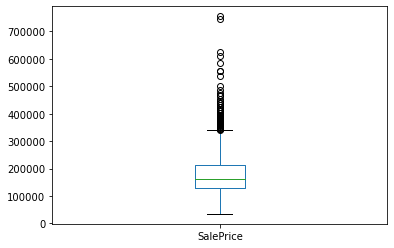

In [40]:
df['SalePrice'].plot(kind='box')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

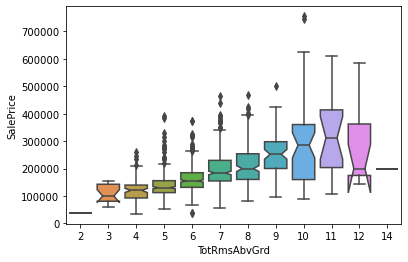

In [41]:
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', notch=True, data=df)